In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

# Poissonization #

A binomial $(n, p)$ random variable has a finite number of values: it can only be between 0 and $n$. But now that we are studying the behavior of binomial probabilities as $n$ gets large, it is time to move from finite outcome spaces to spaces that are infinite. 

Our first example of a probability distribution on infinitely many values is motivated by the approximation we have developed for the binomial $(n, p)$ distribution when $n$ is large and $p$ is small. Under those assumptions we
saw that the chance of $k$ successes in $n$ i.i.d. Bernoulli $(p)$ trials is roughly

$$
P(k) ~ \approx ~ e^{-\mu} \frac{\mu^k}{k!}, ~~ k = 0, 1, 2, \ldots, n
$$
where $\mu = np$.

The terms in the approximation are proportional to terms in the series expansion of $e^\mu$, but *that expansion is infinite*. It doesn't stop at $n$, so we won't either. 

A little care is required before we go further. First, we must state the additivity axiom of probability theory in terms of countably many outcomes:

If events $A_1, A_2, \ldots $ are mutually exclusive, then

$$
P(\bigcup_{i=1}^\infty A_i) ~ = ~ \sum_{i=1}^\infty P(A_i)
$$

This is called the *countable additivity* axiom, in contrast to the finite additivity axiom we have thus far assumed. It doesn't follow from finite additivity, but of course finite additivity follows from it. 

In this course, we will not go into the technical aspects of countable additivity and the existence of probability functions that satisfy the axioms on the spaces that interest us. But those technical aspects do have to be studied before you can develop a deeper understanding of probability theory. If you want to do that, a good start is to take Real Analysis and then Measure Theory.

While in Prob 140, you don't have to worry about it. Just assume that all our work is consistent with the axioms. 

Here is our first infinite valued distribution.

### Poisson Distribution ###
A random variable $X$ has the *Poisson distribution with parameter $\mu > 0$* if

$$
P(X = k) ~ = ~ e^{-\mu} \frac{\mu^k}{k!}, ~~~~ k = 0, 1, 2, \ldots
$$

The terms are proportional to the terms in the infinte series expansion of $e^{\mu}$. These terms $\frac{\mu^k}{k!}$ for $k \ge 0$ determine the shape of the distribution.

The constant of proportionality is $e^{-\mu}$. It doesn't affect the shape. It just ensures that the probabilities add up to 1.

$$
\sum_{k=0}^\infty P(X = k) 
~ = ~ \sum_{k=0}^\infty e^{-\mu} \frac{\mu^k}{k!} 
~ = ~ e^{-\mu} \sum_{k=0}^\infty \frac{\mu^k}{k!} 
~ = ~ e^{-\mu} \cdot e^{\mu} ~ = ~ 1
$$ 

The Poisson is a distribution in its own right. It does not have to arise as a limit, though it is sometimes helpful to think of it that way.

### An Interpretation of the Parameter ###
To understand the parameter $\mu$ of the Poisson distribution, a first step is to notice that mode of the distribution is just around $\mu$. Here is an example where $\mu = 3.74$. No computing system can calculate infinitely many probabilities, so we have just calculated the Poisson probabilities till the sum is close enough to 1 that the `prob140` library considers it a Distribution object. 

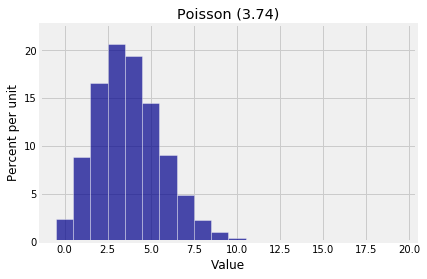

In [2]:
mu = 3.74
k = range(20)
poi_probs_374 = stats.poisson.pmf(k, mu)
poi_dist_374 = Table().values(k).probability(poi_probs_374)
Plot(poi_dist_374)
plt.title('Poisson (3.74)');

The mode is 3. To find a formula for the mode, follow the process we used for the binomial: calculate the consecutive odds ratios, notice that they are decreasing, and see where they cross 1. This is left to you as an exercise. Your calculations should conclude the following:

#### Mode of the Poisson ####
The mode of the Poisson distribution is the integer part of $\mu$. That is, the most likely value is $\mu$ rounded *down* to an integer. If $\mu$ is an integer, both $\mu$ and $\mu - 1$ are modes.

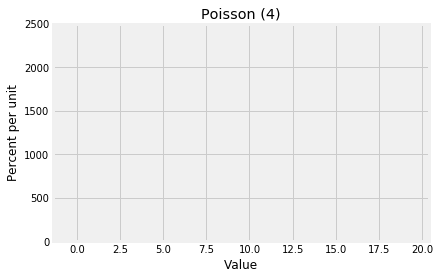

In [3]:
mu = 4
k = range(20)
poi_probs_4 = stats.poisson.pmf(k, mu)
poi_dist_4 = Table().values(k).probability(poi_probs_4)
Plot(poi_dist_4)
plt.ylim(0, 25)
plt.title('Poisson (4)');

In later chapters we will learn a lot more about the parameter $\mu$ of the Poisson distribution. For now, just keep in mind that the most likely value is essentially $\mu$.

### The Cumulative Distribution Function (c.d.f.) ###
Very often, we need probabilities of the form $P(X > x)$ or $P(X \le x)$. For example, if $X$ has the Poisson $(4)$ distribution, here is the event $\{ X \le 5 \}$.

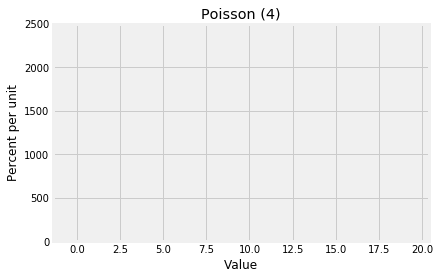

In [4]:
Plot(poi_dist_4, event=range(6))
plt.ylim(0, 25)
plt.title('Poisson (4)');

The *cumulative distribution function* or c.d.f. of any random variable is a function that calculates this "area to the left" of any point. If you denote the c.d.f. by $F$, then
$$
F(x) = P(X \le x)
$$
for any x. 

We will get to know this function better later in the course. For now, note that `stats` lets you calculate it directly without having to use `pmf` and then summing. The function is called `stats.distribution_name.cdf` where `distribution_name` could be `binom` or `poisson` or any other distribution name that `stats` recognizes. The first argument is $x$, followed by the parameters of the distribution in a specified order. In the case of the Poisson, there is just one parameter $\mu$.

For $X$ a Poisson $(4)$ random variable, the gold area above is $P(X \le 5)$ which is about 78.5%.

In [5]:
stats.poisson.cdf(5, 4)

0.78513038703040516

Just to be sure, you can check that the answer is the same as what you would have got by summing the probabilities of the individual values:

In [6]:
sum(stats.poisson.pmf(np.arange(6), 4))

0.78513038703040505